<a href="https://colab.research.google.com/github/ussalbt/deep-learning-with-python/blob/main/DL_S10_Part_1_(Univariate_Time_Series_with_RNN_RSCCASN)_tanh_2layer_tam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# Data Info

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data¶

In [3]:
df = pd.read_csv('/content/sample_data/RSCCASN.csv',
                index_col='DATE',
                parse_dates=True# datetime olması için 2 komut önemli
                )

In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
df.columns = ['Sales']

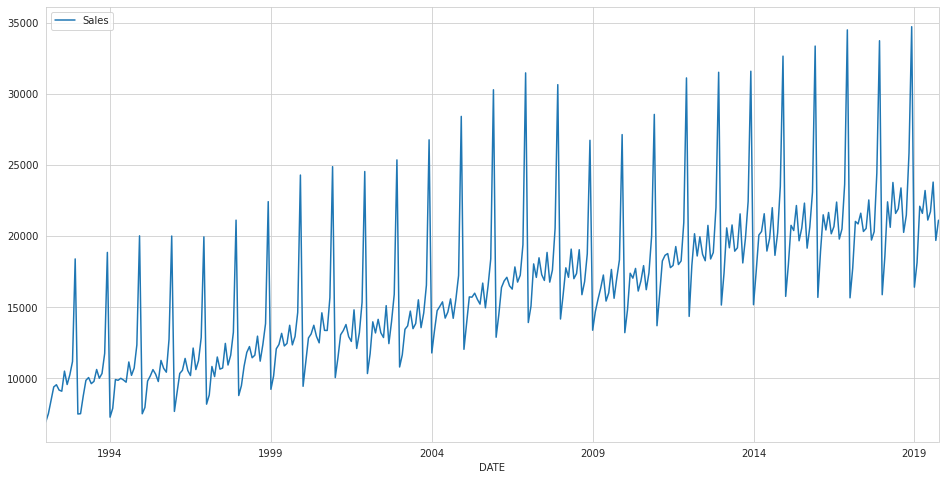

In [7]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [8]:
len(df)

334

In [9]:
test_size = 24

In [10]:
test_ind = len(df)- test_size
test_ind

310

In [11]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [12]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [13]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


## Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# help(TimeseriesGenerator)

In [20]:
length = 12
batch_size = 1#update ilgilendiriyor
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [19]:
len(generator)

298

In [21]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]), array([[0.02047633]]))

In [22]:
X, y = generator[0]

In [23]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


# Modelling

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [25]:
train_scaled.shape

(310, 1)

In [26]:
n_features = train_scaled.shape[1]

In [27]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))#return _sequences =True olunca 
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [ ]:
4 * ((100+1)*50+(50**2))

30200

## EarlyStopping and Validation Generator

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [31]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [32]:
len(validation_generator)

12

In [33]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
298/298 [==============================] - 9s 16ms/step - loss: 0.0226 - val_loss: 0.0259
Epoch 2/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0194 - val_loss: 0.0330
Epoch 3/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0186 - val_loss: 0.0235
Epoch 4/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0178 - val_loss: 0.0235
Epoch 5/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0174 - val_loss: 0.0311
Epoch 6/120
298/298 [==============================] - 4s 15ms/step - loss: 0.0157 - val_loss: 0.0208
Epoch 7/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0150 - val_loss: 0.0239
Epoch 8/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0144 - val_loss: 0.0384
Epoch 9/120
298/298 [==============================] - 4s 13ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 10/120
298/298 [==============================] - 4s 13ms/step - loss: 0.012

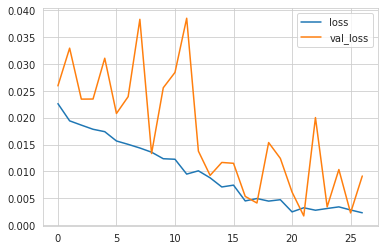

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Evaluation on Test Data

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [37]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [38]:
predictions_scaled

[array([0.65566176], dtype=float32),
 array([0.95370567], dtype=float32),
 array([0.3645628], dtype=float32),
 array([0.4471557], dtype=float32),
 array([0.53953946], dtype=float32),
 array([0.5335916], dtype=float32),
 array([0.53871], dtype=float32),
 array([0.49471164], dtype=float32),
 array([0.49723226], dtype=float32),
 array([0.50812334], dtype=float32),
 array([0.44322523], dtype=float32),
 array([0.4951537], dtype=float32)]

In [39]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.9091293313506232 
mae: 0.0399967244217548 
mse: 0.0020125513589433785 
rmse: 0.044861468533067196


## Inverse Transformation and Comparing

In [40]:
predictions = scaler.inverse_transform(predictions_scaled)

In [41]:
compare = test[:12]

In [42]:
compare['Predictions'] = predictions

In [43]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,24997.548
2017-12-01,33720,33206.869
2018-01-01,15881,16979.518
2018-02-01,18585,19254.457
2018-03-01,22404,21799.075
2018-04-01,20616,21635.248
2018-05-01,23764,21776.228
2018-06-01,21589,20564.337
2018-07-01,21919,20633.765


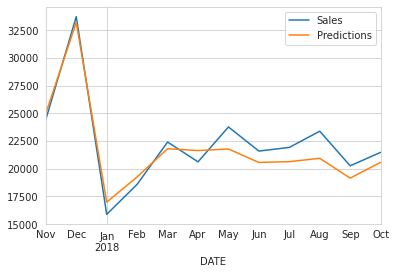

In [46]:
compare.plot()

In [45]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.909129331350623 
mae: 1101.6697774728148 
mse: 1526866.2357890066 
rmse: 1235.664289274804


# Retrain and Forecasting

In [47]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [48]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [49]:
len(df)

334

In [50]:
len(generator)

322

In [51]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 8s 13ms/step - loss: 0.0226
Epoch 2/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0194
Epoch 3/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0186
Epoch 4/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0173
Epoch 5/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0192
Epoch 6/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0161
Epoch 7/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0161
Epoch 8/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0142
Epoch 9/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0131
Epoch 10/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0097
Epoch 11/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0083
Epoch 12/15
322/322 [==============================] - 4s 13ms/step - loss: 0.0083
Epoch 13/15
3

In [52]:
scaled_full_data.shape

(334, 1)

In [53]:
scaled_full_data[-length:].shape

(12, 1)

In [54]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [55]:
forecast = scaler.inverse_transform(forecast)

In [57]:
forecast

array([[27059.65001583],
       [32566.3564558 ],
       [18370.28003097],
       [20303.38769436],
       [23058.44997644],
       [22945.91455793],
       [23616.69598484],
       [22129.7298708 ],
       [22537.95601702],
       [22790.39154863],
       [20793.45181131],
       [22969.78889132]])

In [58]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [59]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [60]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [61]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [62]:
forecast_df

,Forecast
2019-11-01,27059.650
2019-12-01,32566.356
2020-01-01,18370.280
2020-02-01,20303.388
2020-03-01,23058.450
2020-04-01,22945.915
2020-05-01,23616.696
2020-06-01,22129.730
2020-07-01,22537.956
2020-08-01,22790.392


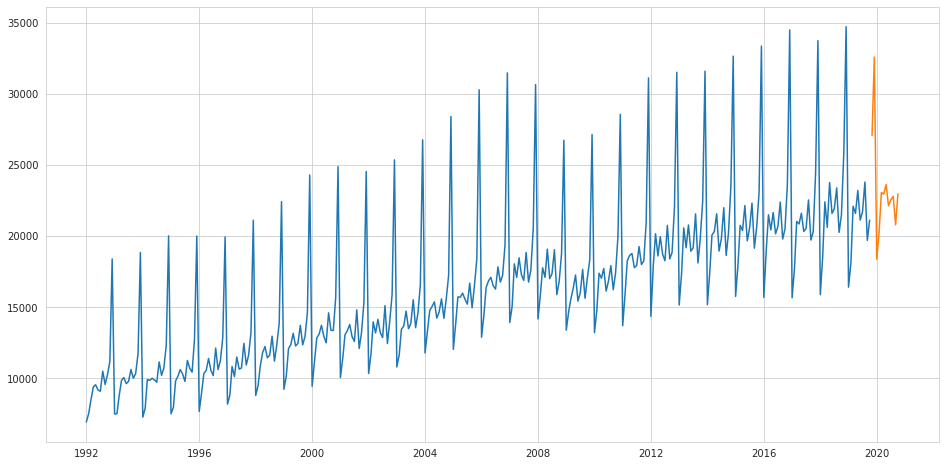

In [63]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

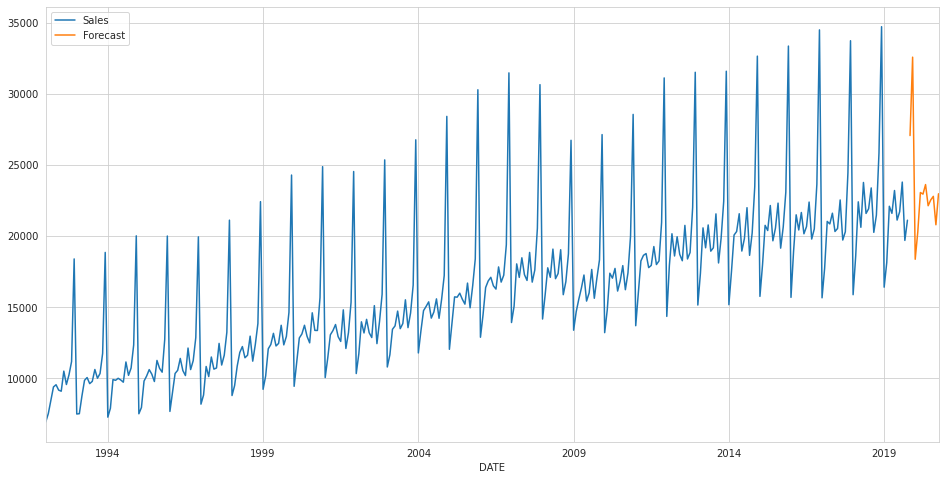

In [65]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

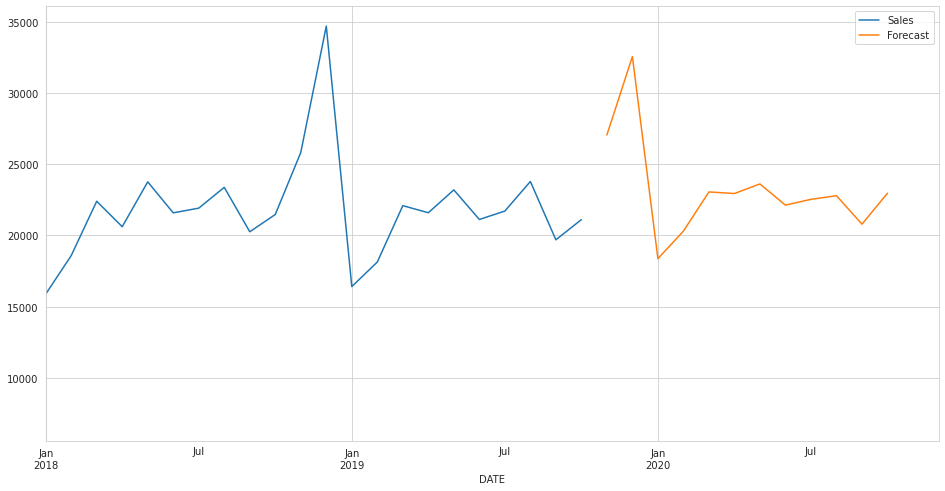

In [67]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [68]:
dataset_total = pd.concat((df['Sales'], forecast_df['Forecast']), axis=0)

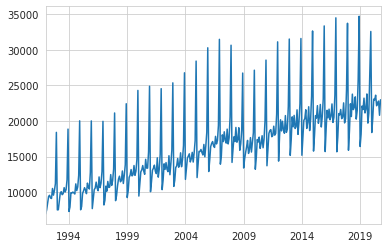

In [69]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___